Data Analysis on Fruity vice Dataset

Importing libraries

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model

Loading data from API

In [2]:
raw_data = requests.get('https://fruityvice.com/api/fruit/all')
output = json.loads(raw_data.text)
df_u = pd.json_normalize(output)
df_u['name'] = df_u['name'].str.strip()
df_u['family'] = df_u['family'].str.strip()
df_u['order'] = df_u['order'].str.strip()
df_u['genus'] = df_u['genus'].str.strip()
df_u.head(n=10)

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,81,0.00,18.00,18.0,0.00
1,Strawberry,3,Rosaceae,Rosales,Fragaria,29,0.40,5.40,5.5,0.80
2,Banana,1,Musaceae,Zingiberales,Musa,96,0.20,17.20,22.0,1.00
3,Tomato,5,Solanaceae,Solanales,Solanum,74,0.20,2.60,3.9,0.90
4,Pear,4,Rosaceae,Rosales,Pyrus,57,0.10,10.00,15.0,0.40
5,Durian,60,Malvaceae,Malvales,Durio,147,5.30,6.75,27.1,1.50
6,Blackberry,64,Rosaceae,Rosales,Rubus,40,0.40,4.50,9.0,1.30
7,Lingonberry,65,Ericaceae,Ericales,Vaccinium,50,0.34,5.74,11.3,0.75
8,Kiwi,66,Actinidiaceae,Struthioniformes,Apteryx,61,0.50,9.00,15.0,1.10
9,Lychee,67,Sapindaceae,Sapindales,Litchi,66,0.44,15.00,17.0,0.80


In [3]:
df_u.shape

(49, 10)

Sorted by name 

In [4]:
sorted_name = df_u.sort_values(by='name')
sorted_name.head(n=10)

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
47,Annona,103,Annonaceae,Rosales,Annonas,92,0.29,3.40,19.10,1.5
22,Apple,6,Rosaceae,Rosales,Malus,52,0.40,10.30,11.40,0.3
24,Apricot,35,Rosaceae,Rosales,Prunus,15,0.10,3.20,3.90,0.5
34,Avocado,84,Lauraceae,Laurales,Persea,160,14.66,0.66,8.53,2.0
2,Banana,1,Musaceae,Zingiberales,Musa,96,0.20,17.20,22.00,1.0
6,Blackberry,64,Rosaceae,Rosales,Rubus,40,0.40,4.50,9.00,1.3
21,Blueberry,33,Rosaceae,Rosales,Fragaria,29,0.40,5.40,5.50,0.0
48,Ceylon Gooseberry,104,Salicaceae,Malpighiales,Dovyalis,47,0.30,8.10,9.60,1.2
37,Cherry,9,Rosaceae,Rosales,Prunus,50,0.30,8.00,12.00,1.0
36,Cranberry,87,Ericaceae,Ericales,Vaccinium,46,0.10,4.00,12.20,0.4


Checking if there is any null values in our dataset

In [5]:
df_u.isnull().sum()

name                        0
id                          0
family                      0
order                       0
genus                       0
nutritions.calories         0
nutritions.fat              0
nutritions.sugar            0
nutritions.carbohydrates    0
nutritions.protein          0
dtype: int64

Data Information

In [6]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      49 non-null     object 
 1   id                        49 non-null     int64  
 2   family                    49 non-null     object 
 3   order                     49 non-null     object 
 4   genus                     49 non-null     object 
 5   nutritions.calories       49 non-null     int64  
 6   nutritions.fat            49 non-null     float64
 7   nutritions.sugar          49 non-null     float64
 8   nutritions.carbohydrates  49 non-null     float64
 9   nutritions.protein        49 non-null     float64
dtypes: float64(4), int64(2), object(4)
memory usage: 4.0+ KB


1a Top 5 fruits with highest calories

In [7]:
high_cal = df_u.sort_values(by = 'nutritions.calories', ascending = False)
high_cal[['name','nutritions.calories']].head(n=5)

,name,nutritions.calories
41,Hazelnut,628
34,Avocado,160
5,Durian,147
13,Passionfruit,97
2,Banana,96


1b Top 5 fruits with lowest calories

In [8]:
low_cal = df_u.sort_values(by = 'nutritions.calories', ascending = True)
low_cal[['name','nutritions.calories']].head(n=5)

,name,nutritions.calories
24,Apricot,15
16,GreenApple,21
44,Pumpkin,25
28,Lime,25
19,Lemon,29


We can see from the sorting and histogram that the Calories value of Hazelnut is acting as a Outliers in the dataset

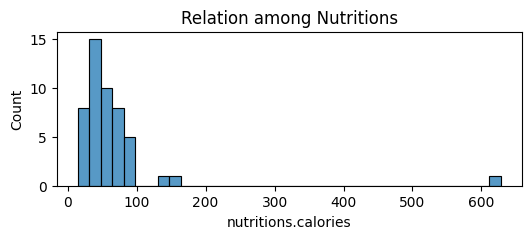

In [9]:
plt.figure(figsize = (6,2))
plt_ran = sns.histplot(data=df_u['nutritions.calories'])
plt_ran.set_title('Relation among Nutritions')
plt.show()

We can use 2-3 standard deviation to measure the outliers and remove them

In [10]:
upper = df_u['nutritions.calories'].mean() + 3*df_u['nutritions.calories'].std()
lower = df_u['nutritions.calories'].mean() - 3*df_u['nutritions.calories'].std()
upper, lower

(327.8729730334761, -190.8525648702108)

Here hazelnut is outliers and for its value we cant get accurate results

In [11]:
df_u[(df_u['nutritions.calories'] < lower) | (df_u['nutritions.calories'] > upper)]

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
41,Hazelnut,96,Betulaceae,Fagales,Corylus,628,61.0,4.3,17.0,15.0


Result without outliers

In [12]:
df = df_u[(df_u['nutritions.calories'] > lower) & (df_u['nutritions.calories'] < upper)]
df.shape

(48, 10)

2a Top 5 fruits with highest fat

In [13]:
high_fat = df.sort_values(by = 'nutritions.fat', ascending = False)
high_fat[['name','nutritions.fat']].head()

,name,nutritions.fat
34,Avocado,14.66
5,Durian,5.30
30,Dragonfruit,1.50
40,Horned Melon,1.26
29,Pomegranate,1.20


2b Top 5 fruits with lowest fat

In [14]:
low_fat = df.sort_values(by = 'nutritions.fat', ascending = True)
low_fat[['name','nutritions.fat']].head()

,name,nutritions.fat
0,Persimmon,0.0
25,Melon,0.0
42,Pomelo,0.0
39,Jackfruit,0.0
28,Lime,0.1


3a Top 5 fruits with highest sugar

In [15]:
high_sugar = df.sort_values('nutritions.sugar', ascending = False)
high_sugar[['name','nutritions.sugar']].head()

,name,nutritions.sugar
39,Jackfruit,19.10
0,Persimmon,18.00
2,Banana,17.20
43,Mangosteen,16.11
31,Grape,16.00


3b Top 5 fruits with lowest sugar

In [16]:
low_sugar = df.sort_values('nutritions.sugar')
low_sugar[['name','nutritions.sugar']].head()

,name,nutritions.sugar
12,Gooseberry,0.00
40,Horned Melon,0.50
34,Avocado,0.66
28,Lime,1.70
19,Lemon,2.50


4a Top 5 fruits with highest carbs

In [17]:
high_carbs = df.sort_values('nutritions.carbohydrates', ascending = False)
high_carbs[['name','nutritions.carbohydrates']].head()

,name,nutritions.carbohydrates
5,Durian,27.1
39,Jackfruit,23.2
13,Passionfruit,22.4
2,Banana,22.0
47,Annona,19.1


4b Top 5 fruits with lowest carbs

In [18]:
low_carbs = df.sort_values('nutritions.carbohydrates')
low_carbs[['name','nutritions.carbohydrates']].head()

,name,nutritions.carbohydrates
16,GreenApple,3.1
3,Tomato,3.9
24,Apricot,3.9
44,Pumpkin,4.6
1,Strawberry,5.5


5a Top 5 fruits with highest protein

In [19]:
high_protein = df.sort_values('nutritions.protein', ascending = False)
high_protein[['name','nutritions.protein']].head()

,name,nutritions.protein
30,Dragonfruit,9.00
23,Guava,2.60
13,Passionfruit,2.20
34,Avocado,2.00
40,Horned Melon,1.78


5b Top 5 fruits with lowest protein

In [20]:
low_protein = df.sort_values('nutritions.protein')
low_protein[['name','nutritions.protein']].head()

,name,nutritions.protein
0,Persimmon,0.0
26,Tangerine,0.0
25,Melon,0.0
21,Blueberry,0.0
28,Lime,0.3


Statistical description

In [21]:
df.describe().round(2)

,id,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
count,48.00,48.00,48.00,48.00,48.00,48.00
mean,58.04,56.85,0.78,8.07,12.05,1.08
std,32.62,28.89,2.19,4.93,5.68,1.30
min,1.00,15.00,0.00,0.00,3.10,0.00
25%,31.50,39.00,0.20,4.30,8.23,0.53
50%,67.50,50.00,0.30,8.05,10.65,0.86
75%,82.50,69.25,0.46,10.07,15.50,1.20
max,104.00,160.00,14.66,19.10,27.10,9.00


Relationship between nutrition content of the fruits using Correlation

In [22]:
cor = df[['nutritions.protein','nutritions.fat','nutritions.calories','nutritions.sugar','nutritions.carbohydrates']].corr().rename(columns=lambda x: x.split('.')[-1], index=lambda x: x.split('.')[-1])
cor.round(2)

,protein,fat,calories,sugar,carbohydrates
protein,1.00,0.21,0.23,-0.03,0.06
fat,0.21,1.00,0.66,-0.24,0.05
calories,0.23,0.66,1.00,0.32,0.71
sugar,-0.03,-0.24,0.32,1.00,0.69
carbohydrates,0.06,0.05,0.71,0.69,1.00


Heatmap to visualize the relationship 

correalation lies between -1 to +1 
values close to +-1 shows good relations
whereas values close to 0 shows bad relations

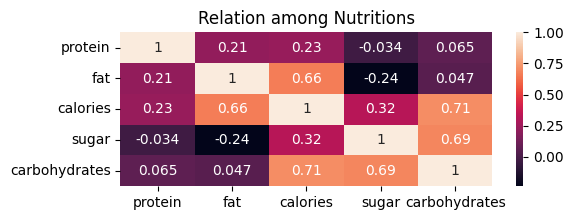

In [23]:
plt.figure(figsize=(6,2))
plot = sns.heatmap(data = cor, annot = True)
plot.set_title('Relation among Nutritions')
plt.show()

Relationship between Calories and Carbs

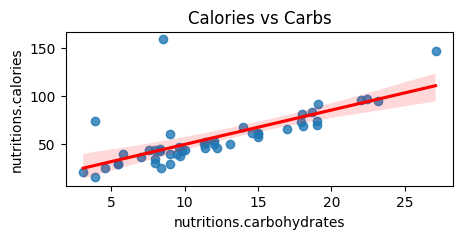

In [24]:
plt.figure(figsize=(5,2))
plot = sns.regplot(y = df['nutritions.calories'], x = df['nutritions.carbohydrates'], line_kws=dict(color="r"))
plot.set_title('Calories vs Carbs')
plt.show()

Relationship between Calories vs Sugar

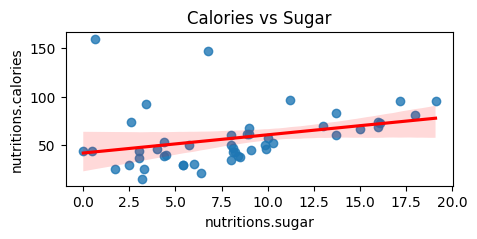

In [25]:
plt.figure(figsize=(5,2))
plot = sns.regplot(y = df['nutritions.calories'], x = df['nutritions.sugar'], line_kws=dict(color="r"))
plot.set_title('Calories vs Sugar')
plt.show()

Distribution of protein content in different fruit families

In [26]:
dist = df.groupby('family')['nutritions.protein'].agg(['mean'])
family_protein = dist.sort_index()
family_protein.head()

,mean
family,
Actinidiaceae,1.12
Anacardiaceae,0.82
Annonaceae,1.50
Bromeliaceae,0.54
Cactaceae,5.00


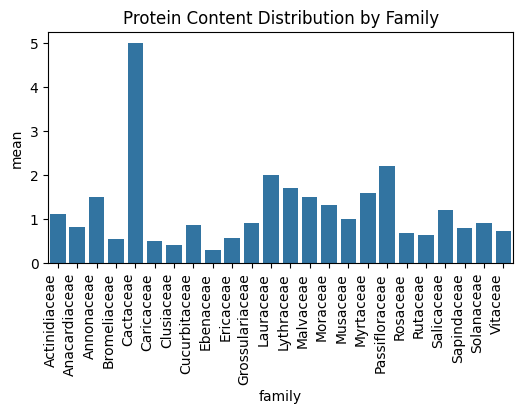

In [27]:
plt.figure(figsize=(6, 3))
sns.barplot(data=family_protein, x='family', y='mean')
plt.title('Protein Content Distribution by Family')
plt.xticks(rotation=90, ha='right')
plt.show()

How does the calorie content vary between fruits of the Rosales order and fruits of the Sapindales order

In [28]:
ros_sap = df[df['order'].isin(['Rosales','Sapindales'])]
ros_sap.head()

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,81,0.00,18.0,18.0,0.0
1,Strawberry,3,Rosaceae,Rosales,Fragaria,29,0.40,5.4,5.5,0.8
4,Pear,4,Rosaceae,Rosales,Pyrus,57,0.10,10.0,15.0,0.4
6,Blackberry,64,Rosaceae,Rosales,Rubus,40,0.40,4.5,9.0,1.3
9,Lychee,67,Sapindaceae,Sapindales,Litchi,66,0.44,15.0,17.0,0.8


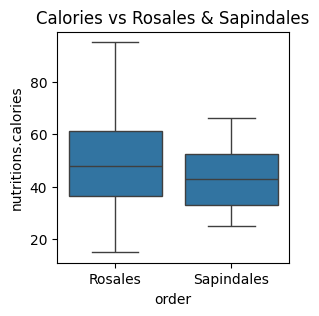

In [29]:
plt.figure(figsize=(3,3))
plt.title('Calories vs Rosales & Sapindales')
sns.boxplot(data=ros_sap, y = 'nutritions.calories', x = 'order')
plt.show()

Average fat content in fruits from the Rosaceae family compared to the Cucurbitaceae family

In [30]:
ros_cucur = df[df['family'].isin(['Rosaceae','Cucurbitaceae'])]
avg_fat_ros_cucur = ros_cucur.groupby('family')['nutritions.fat'].mean().reset_index()
avg_fat_ros_cucur

,family,nutritions.fat
0,Cucurbitaceae,0.440000
1,Rosaceae,0.311818


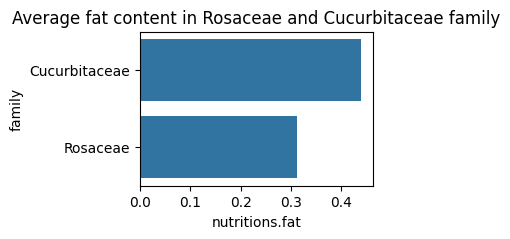

In [31]:
plt.figure(figsize=(3,2))
plt.title('Average fat content in Rosaceae and Cucurbitaceae family')
sns.barplot(data=avg_fat_ros_cucur, y = 'family', x = 'nutritions.fat')
plt.show()

How does the Sugar content vary between fruits of the Citrus genus and fruits of the Malus genus

In [32]:
df.head()

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,81,0.0,18.0,18.0,0.0
1,Strawberry,3,Rosaceae,Rosales,Fragaria,29,0.4,5.4,5.5,0.8
2,Banana,1,Musaceae,Zingiberales,Musa,96,0.2,17.2,22.0,1.0
3,Tomato,5,Solanaceae,Solanales,Solanum,74,0.2,2.6,3.9,0.9
4,Pear,4,Rosaceae,Rosales,Pyrus,57,0.1,10.0,15.0,0.4


In [33]:
cit_mal = df[df['genus'].isin(['Citrus','Malus'])]
cit_mal

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
15,Orange,2,Rutaceae,Sapindales,Citrus,43,0.2,8.2,8.30,1.00
16,GreenApple,72,Rosaceae,Rosales,Malus,21,0.1,6.4,3.10,0.40
19,Lemon,26,Rutaceae,Sapindales,Citrus,29,0.3,2.5,9.00,1.10
22,Apple,6,Rosaceae,Rosales,Malus,52,0.4,10.3,11.40,0.30
26,Tangerine,77,Rutaceae,Sapindales,Citrus,45,0.4,9.1,8.30,0.00
28,Lime,44,Rutaceae,Sapindales,Citrus,25,0.1,1.7,8.40,0.30
42,Pomelo,98,Rutaceae,Sapindales,Citrus,37,0.0,8.5,9.67,0.82


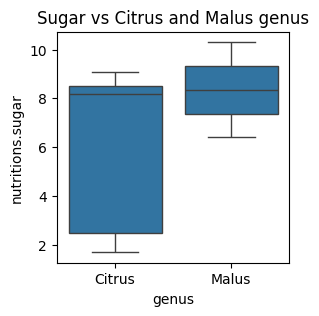

In [34]:
plt.figure(figsize=(3,3))
plt.title('Sugar vs Citrus and Malus genus')
sns.boxplot(data = cit_mal, y = 'nutritions.sugar', x = 'genus')
plt.show()

Using Linear Regression Model to predict calorie content based on the other nutritional components. 
Also check how accurate is the model?

Formula used in the backend 
calory = m1 * fat + m2 * sugar + m3 * carbohydrates + m4 * protein + intercept

In [35]:
reg = linear_model.LinearRegression()
x = df[['nutritions.fat','nutritions.sugar','nutritions.carbohydrates','nutritions.protein']].values
y = df[['nutritions.calories']]
temp = reg.fit(x,y)

In [36]:
reg.coef_

array([[8.24777624, 0.08738928, 3.37286617, 1.22675339]])

In [37]:
reg.intercept_

array([7.76918724])

Here I tried to predict the calory of Orange using Linear Regression

In [38]:
orange_cal_pred = reg.predict([[0.2,8.2,8.30,1.00]])
orange_cal_pred.round(2)

array([[39.36]])

Real value is 43 which is 91.53% accurate

In [39]:
accuracy = (1 - abs(43-39.36)/43)*100
orange_accuracy = round(accuracy,2)
orange_accuracy

91.53